In [1]:
import sys
import re
import os
from datetime import datetime
from time import sleep
from IPython.display import display, clear_output, HTML

# set working dir
WORKING_DIR = re.sub('jdi-qasp-ml.*$','',os.path.normpath(os.getcwd())) + 'jdi-qasp-ml'
os.chdir(WORKING_DIR)

import utils
from utils import *
import torch
import pandas as pd
import numpy as np
import torch
from glob import glob
import selenium
from tqdm.auto import tqdm

START_TS = datetime.now()
display(HTML(f'{START_TS} - Current working directory: <b>{WORKING_DIR}</b>'))

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import numba



2021-06-09 17:41:54,177 -INFO - config:config.py:16 - Module utils.config was loaded
2021-06-09 17:41:54,179 -INFO - common:common.py:616 - Module utils.common is loaded...
2021-06-09 17:41:54,181 -INFO - hidden:hidden.py:121 - hidden module is loaded
2021-06-09 17:41:54,183 -INFO - dataset_builder:dataset_builder.py:202 - dataset package is loaded...
2021-06-09 17:41:54,797 -INFO - dataset:dataset.py:653 - dataset module is loaded...


In [2]:
from utils import get_all_elements, iou_xywh, screenshot, maximize_window, get_parents_list, build_tree_dict, DatasetBuilder

In [3]:
selenium.__version__

'3.141.0'

# Parameters

In [4]:
SITE_URL = 'https://jdi-testing.github.io/jdi-light/'
LOGIN = 'Roman'
PASSWORD = 'Jdi1234'
SAVE_SCREEN = True
WAIT_TIME_SECONDS = 7
HEADLESS = True #False

In [5]:
with open('dataset/classes.txt', 'r') as f:
    decoder_dict = { i:s.strip() for i, s in  enumerate(f.readlines())}
    encoder_dict = { v: k for k, v in decoder_dict.items()}
decoder_dict, encoder_dict

({0: 'button',
  1: 'link',
  2: 'textfield',
  3: 'dropdown',
  4: 'checkbox',
  5: 'radiobutton',
  6: 'textarea',
  7: 'fileinput',
  8: 'iframe',
  9: 'range',
  10: 'progressbar',
  11: 'datetimeselector',
  12: 'colorpicker',
  13: 'numberselector',
  14: 'selector',
  15: 'table',
  16: 'slider-toggle',
  17: 'slider',
  18: 'tree-node',
  19: 'steper',
  20: 'tab',
  21: 'n/a'},
 {'button': 0,
  'link': 1,
  'textfield': 2,
  'dropdown': 3,
  'checkbox': 4,
  'radiobutton': 5,
  'textarea': 6,
  'fileinput': 7,
  'iframe': 8,
  'range': 9,
  'progressbar': 10,
  'datetimeselector': 11,
  'colorpicker': 12,
  'numberselector': 13,
  'selector': 14,
  'table': 15,
  'slider-toggle': 16,
  'slider': 17,
  'tree-node': 18,
  'steper': 19,
  'tab': 20,
  'n/a': 21})

# Generate dataset

In [6]:
DATASET_NAME = 'contact-form'

In [7]:
df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')

In [8]:
df = build_features(df)

2021-06-09 17:41:55,075 -INFO - hidden:hidden.py:107 - build field "is_hidden"


In [9]:
elements_dict = build_elements_dict(df)

In [10]:
df[['tag_name', 'element_id', 'parent_id', 'upper_sibling', 'lower_sibling', 'displayed', 'is_hidden', 'x', 'y', 'width', 'height']]

,tag_name,element_id,parent_id,upper_sibling,lower_sibling,displayed,is_hidden,x,y,width,height
0,HTML,0115620405486209628526219678,None,None,None,True,0,0.000000,0.0,1183.000000,861.0
1,HEAD,7139341153486209624943449581,0115620405486209628526219678,None,1064178599486209620976677771,False,0,0.000000,0.0,0.000000,0.0
2,META,9086147699486209624077011338,7139341153486209624943449581,None,3387206599486209626920495702,False,0,0.000000,0.0,0.000000,0.0
3,TITLE,3387206599486209626920495702,7139341153486209624943449581,9086147699486209624077011338,8574964087486209620349038104,False,0,0.000000,0.0,0.000000,0.0
4,META,8574964087486209620349038104,7139341153486209624943449581,3387206599486209626920495702,5061266808486209627624289143,False,0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
334,A,2754604340486209633589749818,6468319040486209634796161439,None,None,True,0,1052.718750,839.0,30.265625,15.0
335,LI,5243457087486209639806683244,8779026326486209630539556034,6468319040486209634796161439,5514620468486209635198976934,True,0,1097.984375,839.0,2.906250,15.0
336,LI,5514620468486209635198976934,8779026326486209630539556034,5243457087486209639806683244,None,True,0,1115.890625,839.0,64.109375,15.0
337,A,1331571536486209639302963359,5514620468486209635198976934,None,None,True,0,1115.890625,839.0,64.109375,15.0


In [11]:
predictions_df = rule_base_predict(df)
print(predictions_df.shape)
# predictions_df

2021-06-09 17:41:55,455 -INFO - common:common.py:489 - Num radio buttons found: 8
2021-06-09 17:41:55,458 -INFO - common:common.py:493 - Num radio2 buttons found: 0
2021-06-09 17:41:55,460 -INFO - common:common.py:500 - Num checkboxes found: 4
2021-06-09 17:41:55,463 -INFO - common:common.py:507 - Num comboboxes/dropdowns found: 0
2021-06-09 17:41:55,466 -INFO - common:common.py:518 - Num textfields found: 7
2021-06-09 17:41:55,469 -INFO - common:common.py:523 - Num texfields for numbers found: 0
2021-06-09 17:41:55,472 -INFO - common:common.py:528 - Num ranges found: 0
2021-06-09 17:41:55,474 -INFO - common:common.py:533 - Num ordinary text inputs found: 0
2021-06-09 17:41:55,476 -INFO - common:common.py:536 - Num buttons found: 5
2021-06-09 17:41:55,478 -INFO - common:common.py:541 - Num buttons1 found: 1
2021-06-09 17:41:55,480 -INFO - common:common.py:546 - Num buttons2 (Material-UI) found: 0
2021-06-09 17:41:55,482 -INFO - common:common.py:551 - Num links found: 43
(22, 8)


# **Enrich predictions**

In [12]:
# img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
# img_height, img_width = img.shape
# print(img_width, img_height)
# plt.figure(figsize=(15, 500))
# plt.imshow(img, cmap='gray')
# axes = plt.gca()

# for _, r in predictions_df.iterrows():
    
#     patch = patches.Rectangle((r.x, r.y), r.width, r.height, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
#     axes.add_patch(patch)
#     plt.text(r.x, r.y, 
#              decoder_dict[r.label] + ':',  ## + r.element_id, 
#              fontsize = 10, 
#              color = 'white', 
#              backgroundcolor='black',
#              alpha=1.)
    

# Generate and Save Labels

In [13]:
# labels = build_to_yolo(df = predictions_df, img_width=img_width, img_heght=img_height)
# labels

In [14]:
# labeled_df = pd.DataFrame(labels, columns=['label', 'x', 'y', 'width', 'height'])
# labeled_df.label = labeled_df.label.astype(int)
# display(labeled_df)
# labeled_df.to_csv(f'dataset/annotations/{DATASET_NAME}.txt', header=False, sep=' ', index=False)

# Preview Labels

In [24]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape


In [25]:
boxes_df = pd.read_csv(f'dataset/annotations/{DATASET_NAME}.txt', sep=' ', names = ['label', 'x', 'y', 'width', 'height'])
boxes_df
boxes_df['box'] = boxes_df.apply(lambda r: from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height), axis=1)
boxes_df.head()

,label,x,y,width,height,box
0,1,0.049583,0.033030,0.069167,0.027335,"(17, 17, 83, 24)"
1,1,0.130833,0.034169,0.063333,0.029613,"(118, 17, 75, 26)"
2,1,0.214583,0.031891,0.047500,0.061503,"(228, 1, 57, 53)"
3,1,0.291250,0.033030,0.095833,0.063781,"(292, 1, 114, 55)"
4,1,0.380833,0.033599,0.071667,0.064920,"(413, 1, 86, 56)"


In [26]:
# img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
# img_height, img_width = img.shape
# print(img_width, img_height)
# plt.figure(figsize=(15, 500))
# plt.imshow(img, cmap='gray')
# axes = plt.gca()

# for i, r in boxes_df.iterrows():
#     x, y, w, h = from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height)    
#     patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
#     axes.add_patch(patch)
#     plt.text(x, y, 
#              f'({i})' + decoder_dict[r.label] + ':',  ## + r.element_id, 
#              fontsize = 10, 
#              color = 'white', 
#              backgroundcolor='black',
#              alpha=1.)
    

In [27]:
# df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')
df.columns

Index(['attributes', 'displayed', 'element_id', 'height', 'onmouseenter',
       'onmouseover', 'parent_id', 'style', 'tag_name', 'text', 'width', 'x',
       'y', 'is_hidden', 'upper_sibling', 'lower_sibling', 'siblings', 'idx',
       'label', 'annotation_line_no', 'iou', 'tag', 'label_text'],
      dtype='object')

In [28]:
columns_to_drop = set(df.columns).intersection(set(['label', 'annotation_line_no', 'iou', 'tag', 'label_text']))
if len(columns_to_drop) >= 0:
    df.drop(columns=columns_to_drop, inplace=True)

In [29]:
df = assign_labels(df=df, annotations_file_path=f'dataset/annotations/{DATASET_NAME}.txt', img_width=img_width, img_height=img_height)

2021-06-09 17:43:24,796 -INFO - labels:labels.py:40 - Assign labels from annotation file: dataset/annotations/contact-form.txt
2021-06-09 17:43:24,797 -INFO - labels:labels.py:42 - Getting image size
2021-06-09 17:43:24,798 -INFO - labels:labels.py:44 - Image size (w,h): (1200, 878)
2021-06-09 17:43:24,799 -INFO - labels:labels.py:49 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'selector': 14, 'table': 15, 'slider-toggle': 16, 'slider': 17, 'tree-node': 18, 'steper': 19, 'tab': 20, 'n/a': 21}
2021-06-09 17:43:24,799 -INFO - labels:labels.py:57 - getting "n/a" class code
2021-06-09 17:43:24,799 -INFO - labels:labels.py:64 - "n/a" class code: 21
2021-06-09 17:43:24,801 -INFO - labels:labels.py:74 - 37 annotation has been read


Assign labels:   0%|          | 0/37 [00:00<?, ?it/s]

2021-06-09 17:43:26,062 -INFO - labels:labels.py:123 - labels_df: Index(['idx', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'], dtype='object')
2021-06-09 17:43:26,063 -INFO - labels:labels.py:126 - 37 labels have been assigned


In [30]:
df.columns

Index(['attributes', 'displayed', 'element_id', 'height', 'onmouseenter',
       'onmouseover', 'parent_id', 'style', 'tag_name', 'text', 'width', 'x',
       'y', 'is_hidden', 'upper_sibling', 'lower_sibling', 'siblings', 'idx_x',
       'idx_y', 'label', 'annotation_line_no', 'iou', 'tag', 'label_text'],
      dtype='object')

In [31]:
df.label.value_counts()

21    302
1      15
5       8
2       6
0       3
4       2
14      2
6       1
Name: label, dtype: int64

1200 878


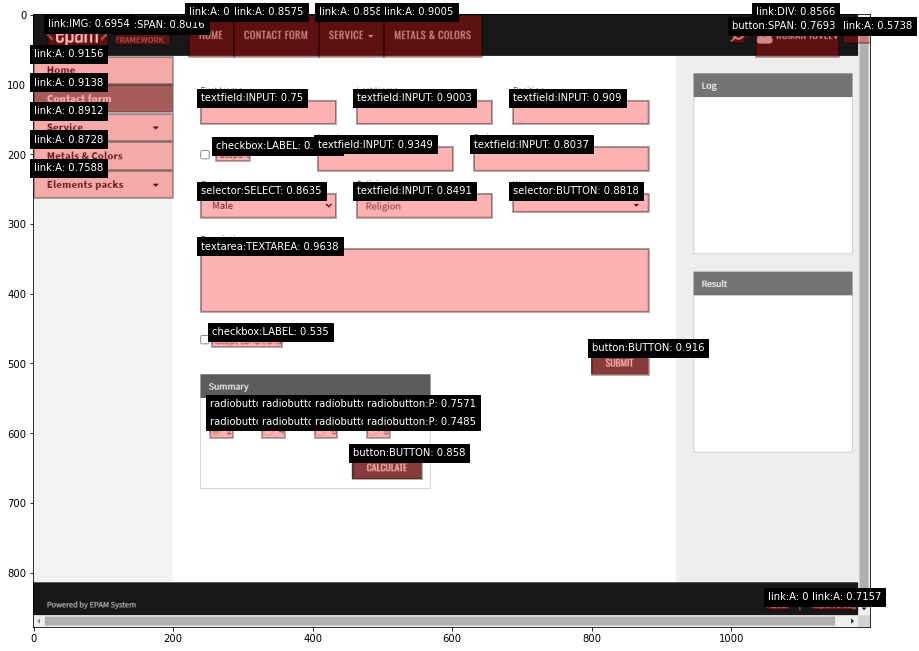

In [32]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 500))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in df[df.label_text != 'n/a'].iterrows():
    x, y, w, h = r.x, r.y, r.width, r.height  
    patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    
    # print(r.tag_name, r.label_text, (x,y,w,h), r.element_id)
    
    axes.add_patch(patch)
    plt.text(x, y, 
             decoder_dict[r.label] + ':' + r.tag_name + ': ' +str(round(r.iou, 4)), # + ':' + str((x, y, w, h)),  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
